# 1.) Import Libraries and Data

In [45]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [46]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
train_path = Path("../Data/cs-training.csv")
train_df = pd.read_csv(train_path)

In [48]:
train_df.shape

(150000, 12)

# 2.) Data Cleaning

In [49]:
# Initial check data
train_df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [50]:
# Drop unnecessary column
train_df.drop(columns=['Unnamed: 0', 'NumberOfTime60-89DaysPastDueNotWorse'], inplace=True)
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0.0


In [51]:
# Check for nulls
train_df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfDependents                       3924
dtype: int64

In [52]:
# Drop null values
train_df = train_df.dropna().copy()

In [53]:
# Verify that nulls were removed
train_df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfDependents                      0
dtype: int64

In [54]:
# Check the data type for each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120269 non-null  float64
 2   age                                   120269 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 4   DebtRatio                             120269 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 7   NumberOfTimes90DaysLate               120269 non-null  int64  
 8   NumberRealEstateLoansOrLines          120269 non-null  int64  
 9   NumberOfDependents                    120269 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 10.1 MB


# 3.) Plot Distribution and Correlation

In [55]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

In [56]:
# Data observations
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfDependents
count,120269.000000,120269.000000,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.851832
std,0.254280,257.040685,14.426684,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,1.148391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.579428,61.000000,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,20.000000


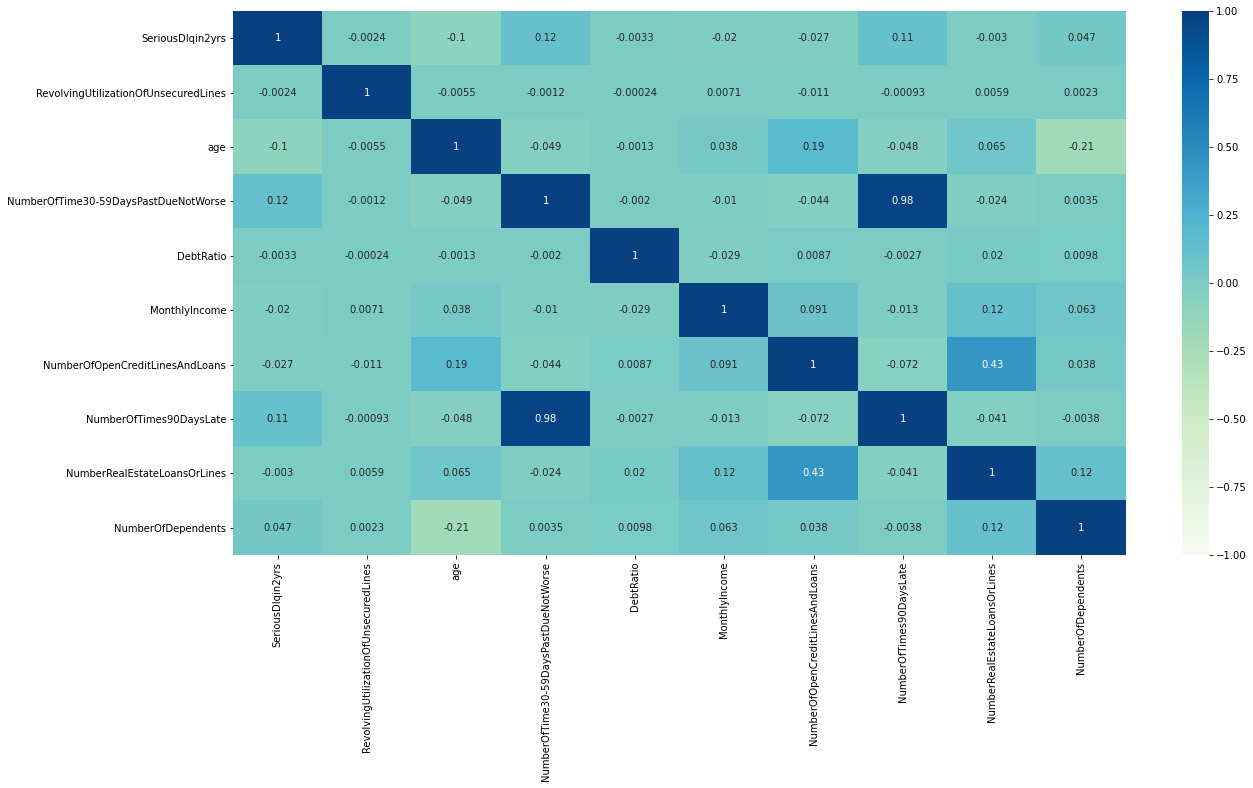

In [57]:
# Identify and plot correlation via heatmap
correlation = train_df.corr()
plt.figure(figsize = (20,10))
corr_plot = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()

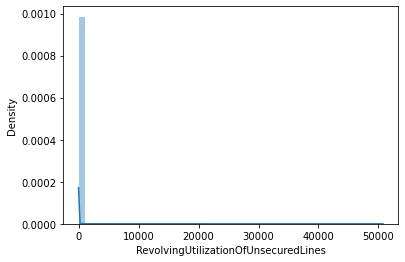

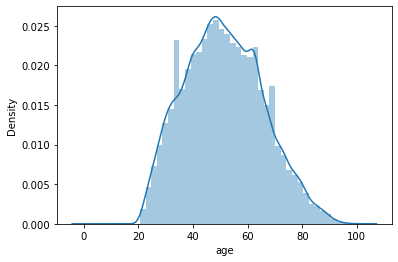

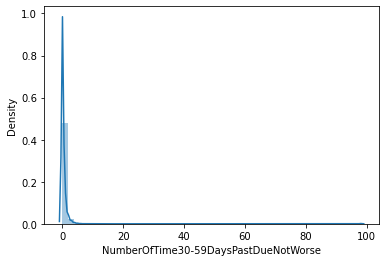

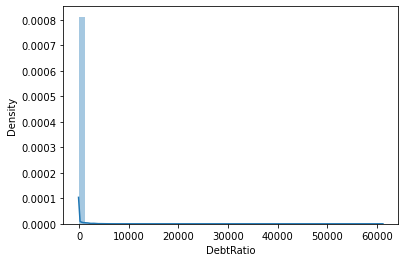

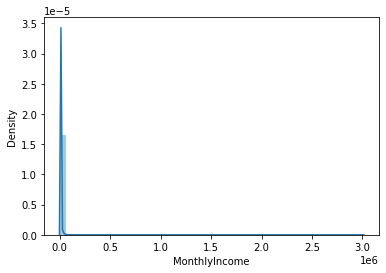

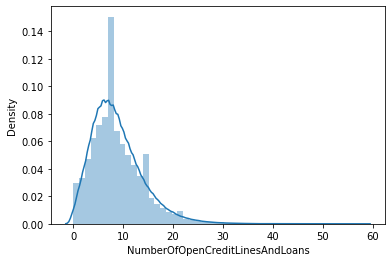

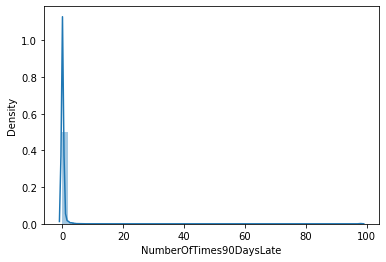

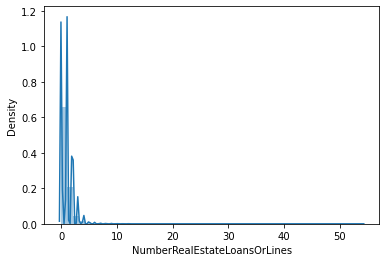

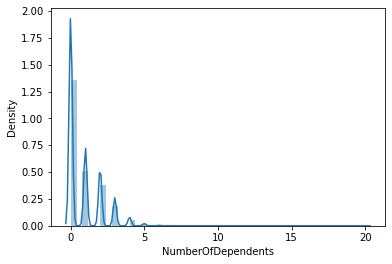

In [60]:
# Plot feature density to scan data disctribution
def DistPlot(col):
    sns.distplot(col)
    plt.show()
DistPlot(train_df['RevolvingUtilizationOfUnsecuredLines'])
DistPlot(train_df['age'])
DistPlot(train_df['NumberOfTime30-59DaysPastDueNotWorse'])
DistPlot(train_df['DebtRatio'])
DistPlot(train_df['MonthlyIncome'])
DistPlot(train_df['NumberOfOpenCreditLinesAndLoans'])
DistPlot(train_df['NumberOfTimes90DaysLate'])
DistPlot(train_df['NumberRealEstateLoansOrLines'])
# DistPlot(train_df['NumberOfTime60-89DaysPastDueNotWorse'])
DistPlot(train_df['NumberOfDependents'])

# 4.) Determine Feature Importance

In [61]:
# Define features set
X = train_df.drop(columns="SeriousDlqin2yrs")
y = train_df["SeriousDlqin2yrs"] #target

In [62]:
# Check the balance of target values
y.value_counts()

0    111912
1      8357
Name: SeriousDlqin2yrs, dtype: int64

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

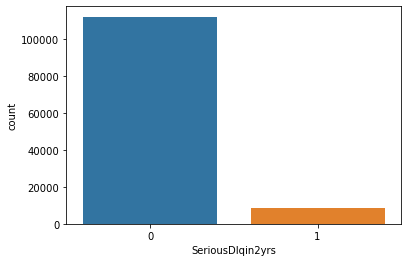

In [63]:
# Plot density of target values
sns.countplot(data = train_df, x = 'SeriousDlqin2yrs')

In [64]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [65]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [66]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [67]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [68]:
# Train data with the BalancedRandomForestClassifier
## the data is imbalanced and non-linear, therefore random forest is the model choice
from imblearn.ensemble import BalancedRandomForestClassifier 

train_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
train_rf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [69]:
# Fitting the model
train_rf = train_rf.fit(X_train_scaled, y_train)

In [70]:
# Making predictions using the testing data
predictions = train_rf.predict(X_test_scaled)

In [71]:
 # Print the imbalanced classification report
y_pred_rf = train_rf.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred_rf))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.97      0.47      0.79      0.64      0.61      0.36     28000
          1       0.10      0.79      0.47      0.18      0.61      0.39      2068

avg / total       0.91      0.50      0.77      0.61      0.61      0.36     30068



In [72]:
importances = train_rf.feature_importances_
sorted(zip(train_rf.feature_importances_, X.columns), reverse=True)

[(0.26118331480753704, 'RevolvingUtilizationOfUnsecuredLines'),
 (0.14548671906710933, 'DebtRatio'),
 (0.13423885727242735, 'MonthlyIncome'),
 (0.11724094649289567, 'age'),
 (0.09407276087579626, 'NumberOfTime30-59DaysPastDueNotWorse'),
 (0.08979721761512734, 'NumberOfTimes90DaysLate'),
 (0.08421788664037348, 'NumberOfOpenCreditLinesAndLoans'),
 (0.038751522116052525, 'NumberOfDependents'),
 (0.03501077511268115, 'NumberRealEstateLoansOrLines')]

<AxesSubplot:title={'center':'Impoprtant Features'}, ylabel='1'>

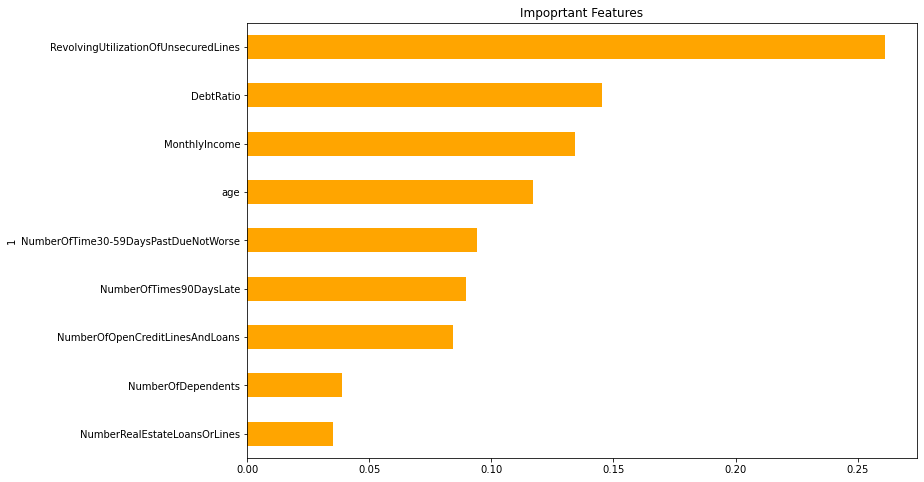

In [73]:
importances_df = pd.DataFrame(sorted(zip(train_rf.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Important Features'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Important Features')
importances_sorted.plot(kind='barh', color='Orange', title='Impoprtant Features', legend=False, figsize=(12,8))